In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as mp
import matplotlib.pyplot as plt
import os

In [27]:
# load in a shapefile
map_df = gpd.read_file("States_GIS/states.dbf")
map_df = map_df[map_df.STATE_NAME !='District of Columbia']

# import main CSV
df = pd.read_csv("Resources/deaths_per.csv", header=0)
# import Percentage of deaths CSV
percentage_df = pd.read_csv("Resources/deaths_summary_data.csv", header=0)
# import GDP Data
gdp_df = pd.read_csv("Resources/GDP.csv", header=0)

# 50 states merge datasets
merged =map_df.set_index('STATE_NAME').join(df.set_index("US State Name"))
mergedP =map_df.set_index('STATE_NAME').join(percentage_df.set_index('State'))
mergedGDP =map_df.set_index('STATE_NAME').join(gdp_df.set_index('State'))

# remove Alaska and Hawaii
map_df = map_df[map_df.STATE_NAME !='Alaska']                
map_df = map_df[map_df.STATE_NAME !='Hawaii']

# 48 states merge datasets
merged48 =map_df.set_index('STATE_NAME').join(df.set_index("US State Name"))
mergedP48 =map_df.set_index('STATE_NAME').join(percentage_df.set_index('State'))
mergedGDP48 =map_df.set_index('STATE_NAME').join(gdp_df.set_index('State'))

In [3]:
def map (title,data,deaths,color,scale,scale_label):
    
    # set the range for the choropleth
    vmin, vmax = scale 
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 5))
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})
    data.plot(column = deaths, cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8')
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    cbar.set_label(scale_label)

    # create an annotation for the data source
    ax.annotate('Source: HealthData.gov, 2009-2018',xy=(0.1, .08),
                xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='top', fontsize=12, color='#555555')

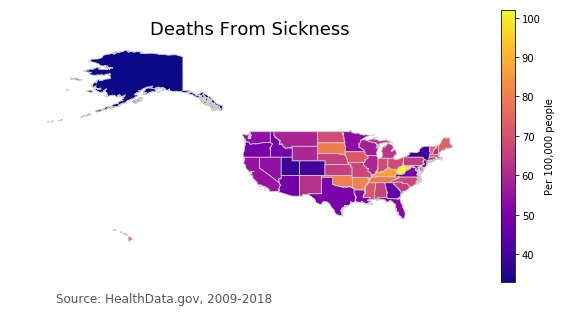

In [4]:
map('Deaths From Sickness',merged,'yearly_sick_deaths_per 1000','plasma',[102,33],'Per 100,000 people')

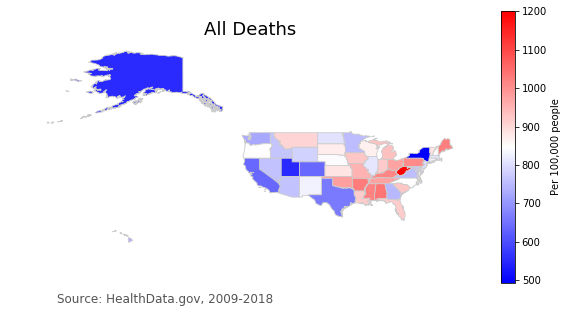

In [5]:
map("All Deaths",merged,'yearly_all_deaths_per_1000','bwr',[1201,494],'Per 100,000 people')

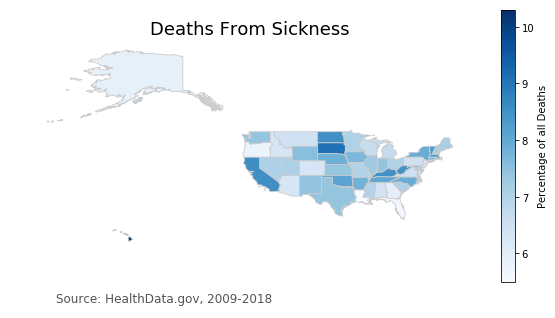

In [6]:
map('Deaths From Sickness',mergedP,'Pecent of deaths due to pneumonia or influenza','Blues',[5.5,10.3],'Percentage of all Deaths')

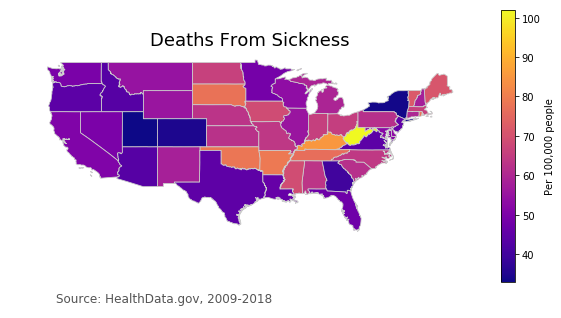

In [7]:
map('Deaths From Sickness',merged48,'yearly_sick_deaths_per 1000','plasma',[102,33],'Per 100,000 people')

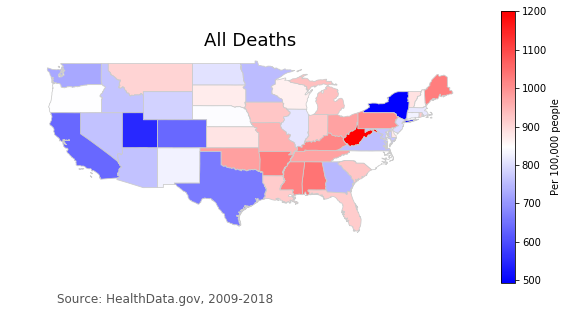

In [8]:
map("All Deaths",merged48,'yearly_all_deaths_per_1000','bwr',[1201,494],'Per 100,000 people')

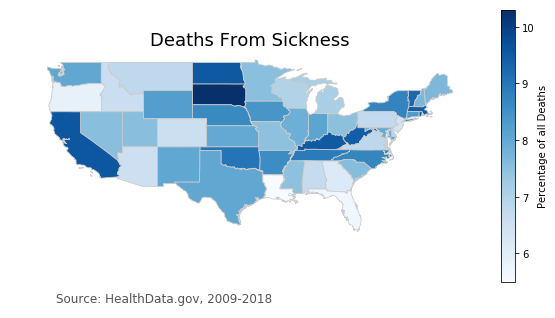

In [9]:
map('Deaths From Sickness',mergedP48,'Pecent of deaths due to pneumonia or influenza','Blues',[5.5,10.3],'Percentage of all Deaths')

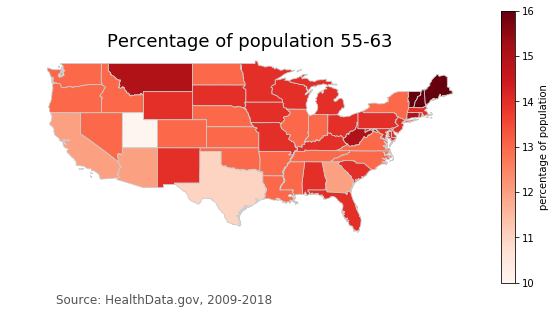

In [10]:
map('Percentage of population 55-63',merged48,'Adults 55-64','Reds',[16,10],'percentage of population')

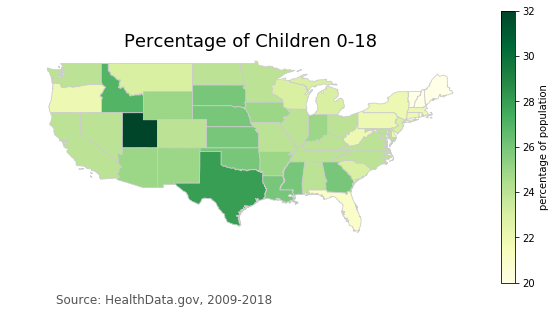

In [11]:
map('Percentage of Children 0-18',merged48,'Children 0-18','YlGn',[32,20],'percentage of population')

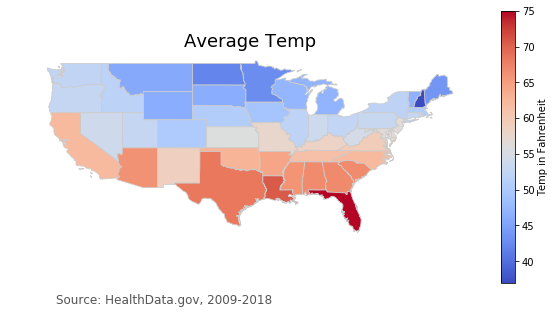

In [13]:
map('Average Temp',merged48,'Avg_temp','coolwarm',[75,37],'Temp in Fahrenheit')

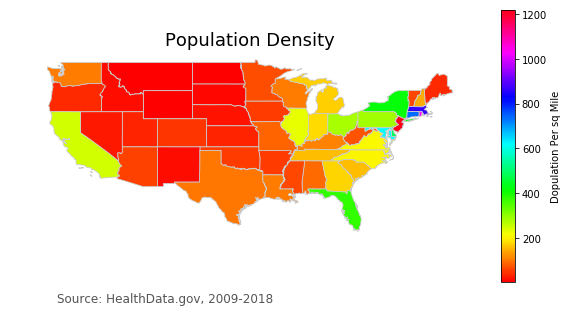

In [14]:
map('Population Density',merged48,'Density (Pop./ mi2)','hsv',[1218,6],'Dopulation Per sq Mile')

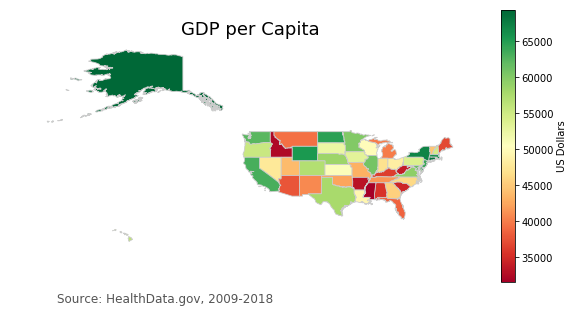

In [30]:
map('GDP per Capita',mergedGDP,'GDP per capita','RdYlGn',[69300,31656],'US Dollars')

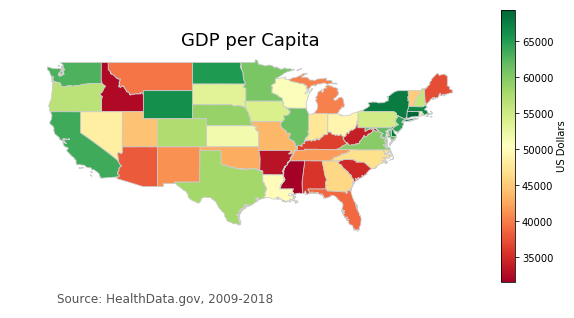

In [31]:
map('GDP per Capita',mergedGDP48,'GDP per capita','RdYlGn',[69300,31656],'US Dollars')